In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('../data/raw/abalone_data.csv')
variances = df.drop(columns=['Sex']).var()
print(variances)

Length             0.014422
Diameter           0.009849
Height             0.001750
Whole weight       0.240481
Shucked weight     0.049268
Viscera weight     0.012015
Shell weight       0.019377
Rings             10.395266
dtype: float64


In [3]:
X = df.drop(columns=['Sex'])
## scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
pca = PCA()
principal_components = pca.fit_transform(X_scaled)
print(pca.components_)

[[ 4.16045412e-01  4.28039988e-01  8.28036838e-02  4.52852685e-01
   3.75815274e-01  3.66772024e-01  3.51214322e-01  1.80681049e-01]
 [ 8.65229261e-03  4.95425465e-02  3.19356059e-02 -1.28754329e-01
  -3.24991053e-01 -1.52288861e-01  1.24387539e-01  9.14105996e-01]
 [-5.61996714e-01 -5.65603770e-01 -2.78496423e-02  3.46583405e-01
   2.37008334e-01  2.87742287e-01  2.67223562e-01  1.81602322e-01]
 [-4.15146976e-02  4.28363842e-02  3.81654463e-02  3.55838163e-02
  -4.20842113e-01 -2.54634824e-01  8.13145347e-01 -3.00942572e-01]
 [-3.33180677e-02  2.42641851e-04 -2.62183560e-02  1.16227178e-01
   5.77243534e-01 -7.99948227e-01  7.21850859e-02  7.97228797e-02]
 [-2.77497622e-01  1.74321810e-01  9.40825809e-01 -4.09819958e-02
   3.21842344e-02 -1.02987602e-02 -6.23685530e-02 -2.72492849e-02]
 [ 6.56398377e-01 -6.79847964e-01  3.21341703e-01 -1.86824419e-02
  -3.45876202e-03 -3.91508290e-02  4.22244264e-02  3.27737368e-03]
 [-1.71383391e-02 -1.82171518e-03 -2.81134854e-02 -8.00889000e-01
   

[0.88693926 0.06146077 0.02733574 0.01028793 0.00844408 0.0023612
 0.00210364 0.00106738]
[0.88693926 0.94840003 0.97573577 0.9860237  0.99446778 0.99682897
 0.99893262 1.        ]


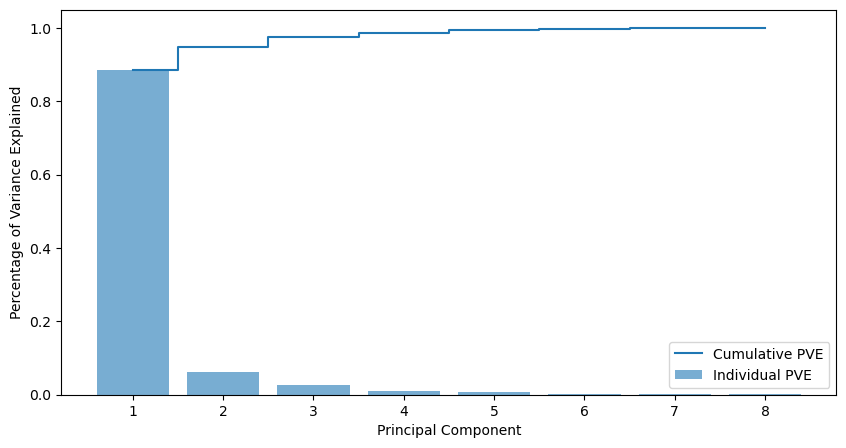

In [4]:

pve = pca.explained_variance_ratio_
cumulative_pve = pve.cumsum()
print(pve)
print(cumulative_pve)



plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pve) + 1), pve, alpha=0.6, label='Individual PVE')
plt.step(range(1, len(pve) + 1), cumulative_pve, where='mid', label='Cumulative PVE')
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.legend(loc='best')
plt.show()

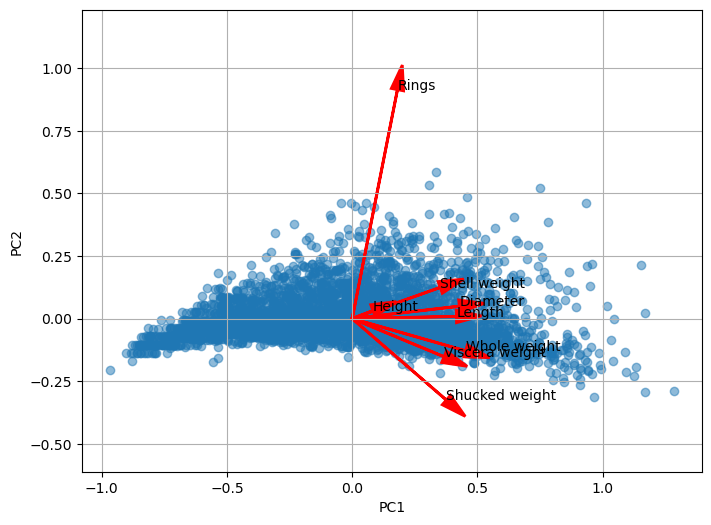

In [5]:

plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
for i, v in enumerate(pca.components_.T):
    plt.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, linewidth=2, color='red')
    plt.text(v[0], v[1], df.columns[i + 1], color='black')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.axis('equal')
plt.show()

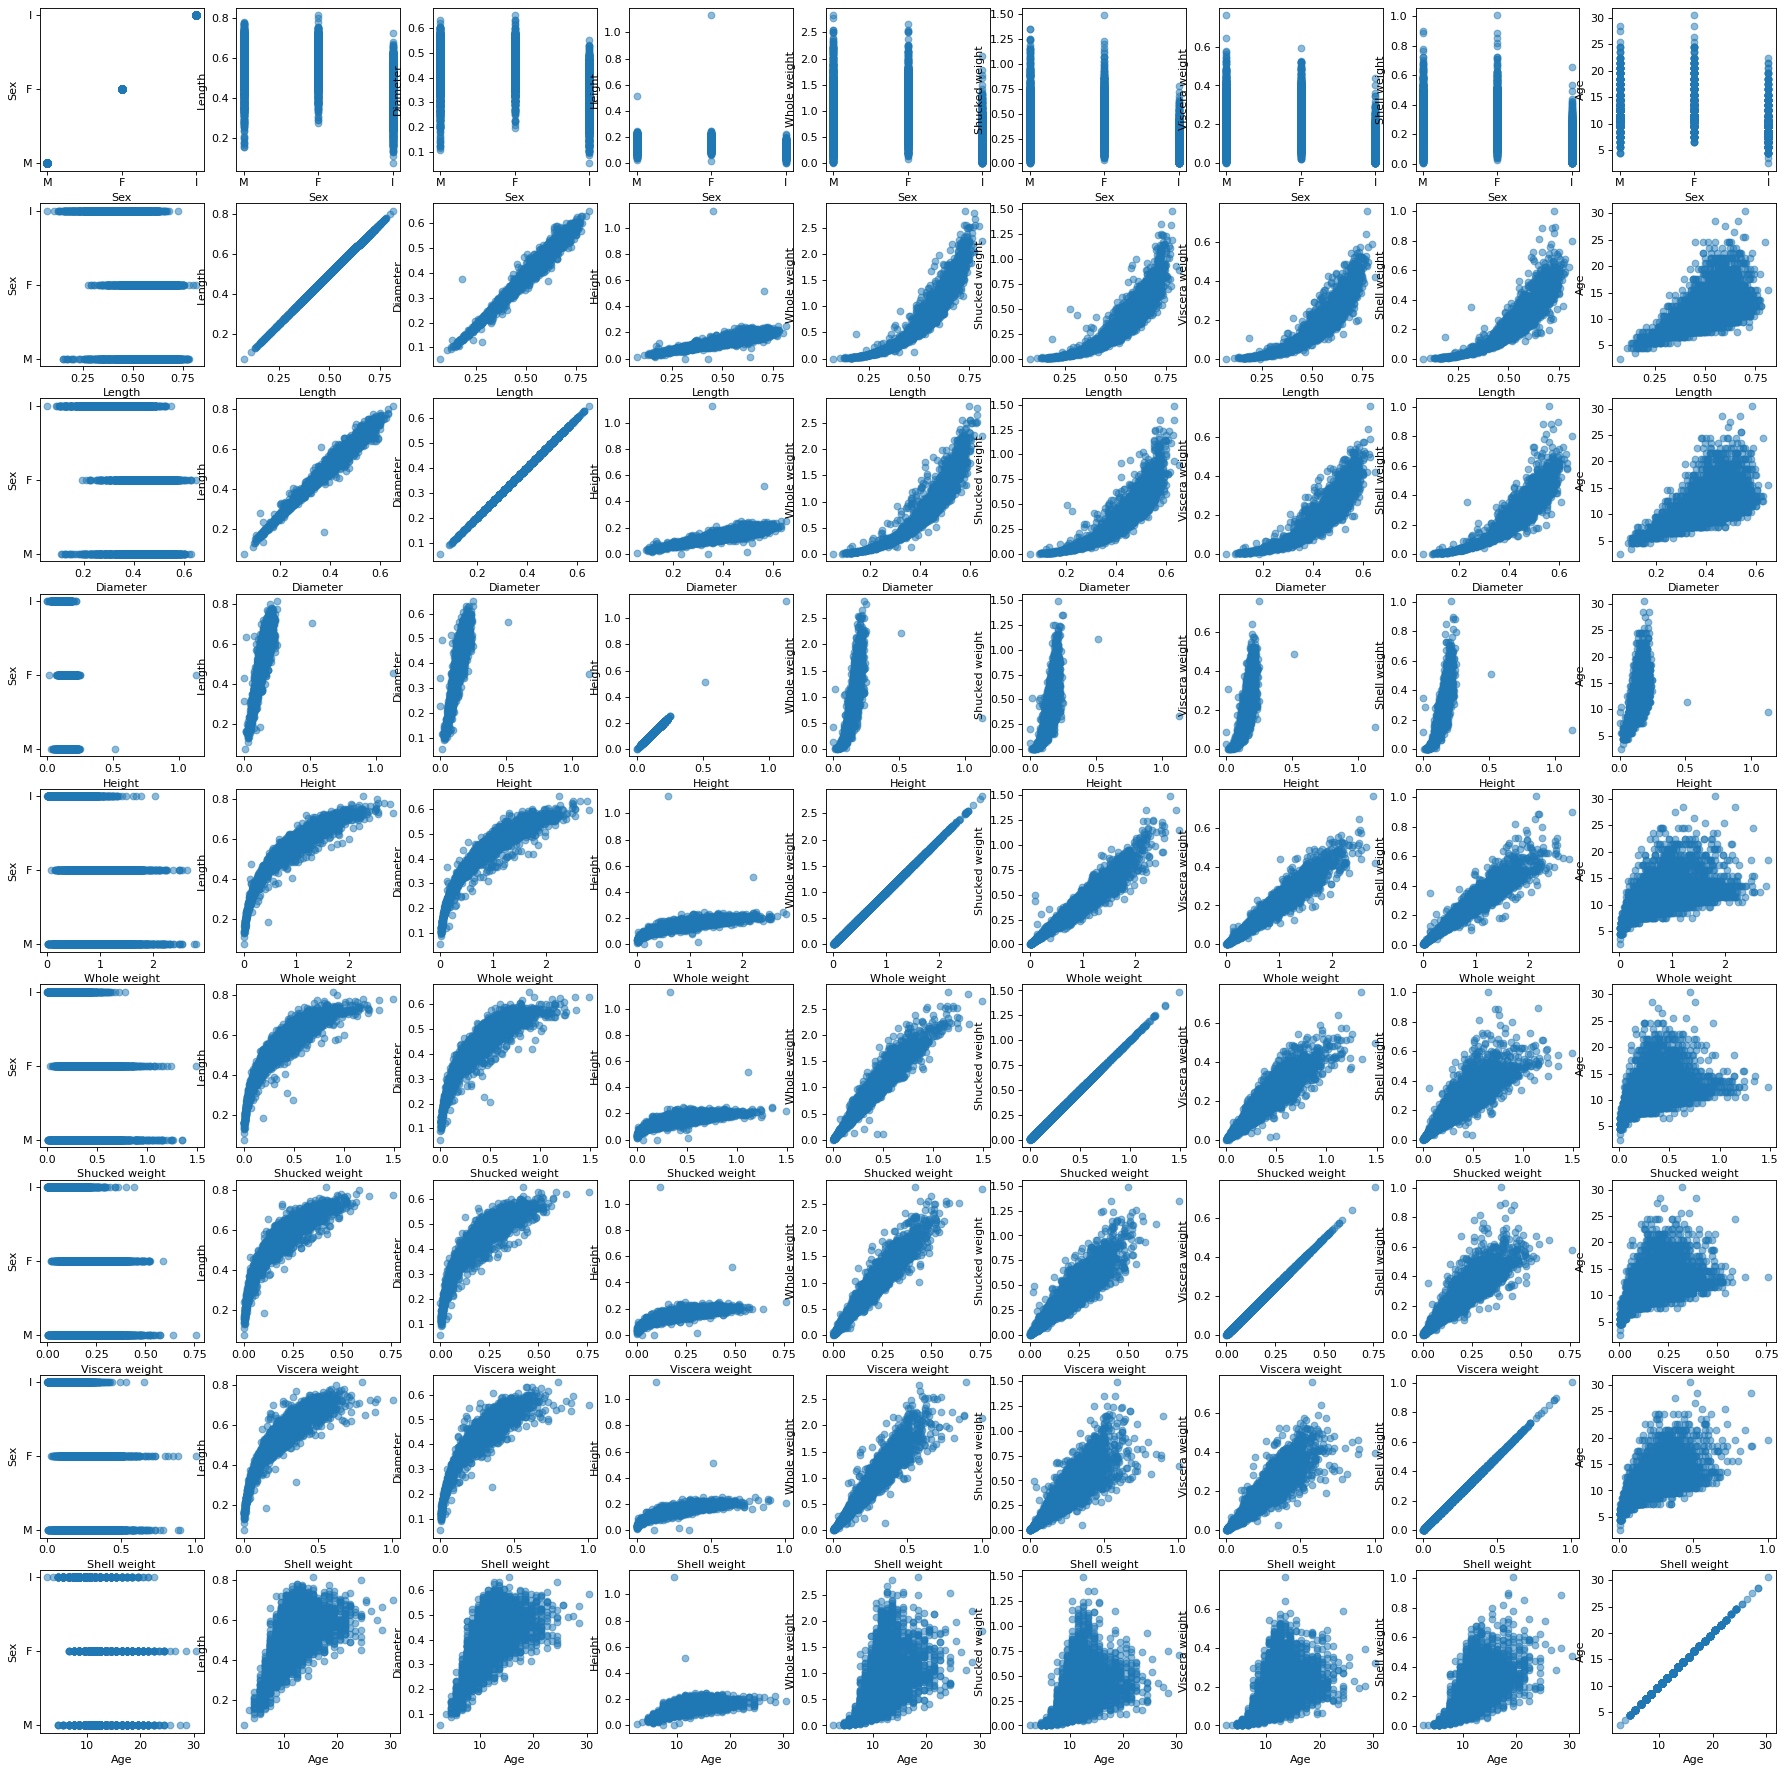

In [6]:

df = pd.read_csv('../data/raw/abalone_data.csv')
fig, ax = plt.subplots(9, 9, figsize=(28, 28), dpi=80)
df['Age'] = df['Rings'] + 1.5

df.drop(columns=['Rings'], inplace=True)
for i, col1 in enumerate(df.columns):
    for j, col2 in enumerate(df.columns):
        ax[i, j].scatter(df[col1], df[col2], alpha=0.5)
        ax[i, j].set_xlabel(col1)
        ax[i, j].set_ylabel(col2)